<center> <span style="color:indigo">Matematicas para la Ciencia de Datos</span> </center>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Centro_Universitario_del_Guadalajara_Logo.png" alt="Drawing" style="width: 600px;"/>
</center>

<center> <span style="color:DarkBlue">PROYECTO INTEGRADOR. </span>  </center>
<center> <span style="color:Blue">Profesor: Iván A. Toledano Juárez </span>  </center>
<center> <span style="color:Blue">Integrantes:

Briseño Esparza Paloma Astrid

López Martin Víctor Hugo

Medrano González Christopher Josué

Morales Cortes Miguel Isay
 </span>  </center>


# Justificación Matemática del Modelo Random Forest para la Predicción de Resultados en la Copa del Mundo


En el presente documento se expone la fundamentación teórica, matemática y práctica de la elección del algoritmo **Random Forest** como el modelo óptimo para predecir los resultados de los partidos de la Copa del Mundo de la FIFA (1930-2022). A través de un análisis de la estructura del modelo, sus propiedades de optimización y su capacidad para manejar la alta varianza propia los deportes, demostramos su superioridad frente a enfoques lineales o de árboles simples.

## 1. Introducción

La predicción de eventos deportivos es un desafío clásico en la ciencia de datos debido a la naturaleza estocástica del fenómeno: el resultado de un partido de fútbol no depende únicamente de estadísticas históricas, sino de una multitud de factores aleatorios.

En el análisis preliminar realizado sobre el historial de partidos de los mundiales, se compararon modelos supervisados y no supervisados. Los resultados empíricos señalaron al **Random Forest** como el modelo con mejor equilibrio entre precisión y generalización. Este proyecto profundiza en el "porqué" matemático de este rendimiento. No nos limitamos a observar la métrica de *accuracy*, sino que desglosamos cómo el método de *Bagging* (Bootstrap Aggregating) y la selección aleatoria de características mitigan los problemas de sobreajuste y capturan las no linealidades de los datos futbolísticos mejor que otros algoritmos.

## 2. Planteamiento del Problema

El propósito de este proyecto es analizar información histórica sobre los partidos de la Copa del Mundo de la FIFA (1930–2022) para modelar matemáticamente la probabilidad de los resultados.

Definimos el problema como una tarea de **clasificación supervisada multiclase**. Dado un vector de características $X$ (que representa las condiciones del partido y la fuerza de los equipos), buscamos aprender una función $f(X)$ que asigne el resultado a una de las tres clases posibles en el espacio de salida $Y$:

$$Y \in \{ \text{Local Gana (1)}, \text{Empate (0)}, \text{Visita Gana (-1)} \}$$

El desafío matemático reside en que la frontera de decisión entre estas clases no es linealmente separable y los datos presentan una alta varianza ("ruido"), lo que requiere un modelo capaz de reducir la varianza sin aumentar excesivamente el sesgo.

## 3. Descripción del Dataset

Se utiliza la base de datos histórica `matches_1930_2022.csv`, que abarca la totalidad de los partidos disputados en la historia de los mundiales.

**Variables principales del análisis:**

* **Variables Objetivo ($Y$):** `Resultado`. Transformada en una variable categórica numérica: $1$ (Local), $0$ (Empate), $-1$ (Visitante).
* **Variables Predictoras ($X$):**
    * `home_team`, `away_team`: Equipos enfrentados (categóricas nominales).
    * `Year`: Año del torneo, útil para ponderar la relevancia temporal (series de tiempo implícitas).
    * `Host`: Indica si el equipo juega en su país, factor crucial de "ventaja de localía".
    * `Round`: Fase del torneo (Grupos, Octavos, Final), que puede correlacionarse con la táctica (jugar al empate vs. ganar obligatoriamente).
    * `Venue`: Estadio/ciudad


El conjunto de datos ha sido preprocesado para manejar valores nulos y codificar variables categóricas, dividiéndolo posteriormente en conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$) para validar las propiedades de generalización del modelo.

## 4. Desarrollo Teórico: El Modelo Random Forest

A continuación, se presenta la justificación matemática formal del modelo seleccionado.

### 4.1 Formulación Matemática del Modelo

El Random Forest es un método de ensamble que consiste en una colección de $B$ árboles de decisión no correlacionados.

Un árbol de decisión individual $T(x)$ divide el espacio de características en $M$ regiones rectangulares disjuntas $R_1, R_2, ..., R_M$. Para una entrada $x$, la predicción es la clase más frecuente en la región a la que pertenece $x$.

Matemáticamente, el modelo de Random Forest para clasificación se define como la moda (voto mayoritario) de las predicciones de los $B$ árboles:

$$\hat{C}_{rf}^{B}(x) = \text{moda} \{ \hat{C}_1(x), \hat{C}_2(x), ..., \hat{C}_B(x) \}$$

Donde:
* $\hat{C}_b(x)$ es la predicción de clase del $b$-ésimo árbol del bosque.
* $x$ es el vector de características de entrada.

### 4.2 Función de Costo y Criterio de Optimización

A diferencia de modelos como la regresión logística que usan el Descenso del Gradiente sobre una función de pérdida global, los árboles dentro del Random Forest se construyen mediante un algoritmo **Voraz (Greedy)** de partición recursiva.

El objetivo en cada nodo del árbol es encontrar el punto de corte óptimo que maximice la "pureza" de los nodos hijos. La métrica de optimización utilizada es la **Impureza de Gini** o la **Entropía**.

Para un nodo $m$ con observaciones de $K$ clases, la impureza de Gini se define como:

$$G_m = \sum_{k=1}^{K} \hat{p}_{mk} (1 - \hat{p}_{mk}) = 1 - \sum_{k=1}^{K} \hat{p}_{mk}^2$$

Donde $\hat{p}_{mk}$ es la proporción de observaciones de la clase $k$ en el nodo $m$.
El algoritmo busca la división que **minimice** la impureza ponderada de los nodos hijos resultantes. Matemáticamente, esto equivale a maximizar la *Ganancia de Información*.

### 4.3 Algoritmo de Aprendizaje

El Random Forest introduce aleatoriedad en el aprendizaje para descorrelacionar los árboles mediante dos mecanismos:

1.  **Bagging (Bootstrap Aggregating):** Cada árbol $T_b$ se entrena con una muestra $Z^{*b}$ de tamaño $N$ tomada con reemplazo del conjunto de entrenamiento original. Esto estabiliza las predicciones.
2.  **Random Subspace Method:** En cada nodo de cada árbol, en lugar de evaluar todas las variables $p$ para buscar el mejor corte, se selecciona un subconjunto aleatorio $m < p$ de variables candidatas. Típicamente $m \approx \sqrt{p}$.

Esto evita que, si existe una variable muy fuerte (ej. "Ranking FIFA"), todos los árboles sean idénticos, garantizando diversidad matemática en el ensamble.

### 4.4 Propiedades Matemáticas Relevantes

* **Naturaleza No Paramétrica:** No asume una distribución normal de los datos ni una relación lineal $Y = X\beta$. Modela distribuciones complejas mediante particiones del espacio.
* **Reducción de Varianza:** Si la varianza de un árbol individual es $\sigma^2$ y la correlación entre árboles es $\rho$, la varianza del bosque es: $$Var(RF) = \rho \sigma^2 + \frac{1-\rho}{B}\sigma^2$$
Al aumentar $B$ (número de árboles), el segundo término tiende a cero. La clave del RF es reducir $\rho$ (mediante la selección aleatoria de *features*) sin aumentar $\sigma^2$ significativamente.
* **Convergencia:** Por la Ley de los Grandes Números, el Random Forest no sobreajusta (overfit) al aumentar el número de árboles; el error de generalización converge a un límite.

### 4.5 Ventajas y Limitaciones Matemáticas

**Ventajas:**
* **No linealidad:** Capaz de capturar interacciones complejas (ej. *Local* gana solo si *Rival* es débil) sin necesidad de definir términos de interacción explícitos en la ecuación.
* **Robustez ante Outliers:** Al promediar (o votar), el efecto de datos atípicos se diluye, a diferencia de modelos basados en mínimos cuadrados que son sensibles a la distancia euclidiana.

**Limitaciones:**
* **No Solución Cerrada:** No existe una fórmula matricial directa (como $(X^TX)^{-1}X^Ty$) para obtener los parámetros; requiere iteración computacional.
* **Extrapolación:** Matemáticamente, un árbol no puede predecir valores fuera del rango observado en el entrenamiento (es una función constante a trozos), lo cual es relevante si las dinámicas del fútbol cambian drásticamente en el futuro.

### 4.6 Argumento Teórico de Selección

Elegimos Random Forest sobre modelos lineales (Logistic Regression) y modelos de alta varianza (Árboles simples) por la naturaleza del problema:

1.  **Dimensionalidad y Ruido:** Los datos de fútbol son "ruidosos". Un árbol simple tendría alta varianza (cambia mucho con pequeños cambios en los datos). El RF reduce esta varianza matemáticamente mediante el promedio.
2.  **Interacciones no lineales:** La relación entre las variables (ej. historia del equipo vs. sede actual) no es aditiva. RF descubre estas estructuras jerárquicas automáticamente.
3.  **Estabilidad:** Dada la cantidad limitada de partidos mundiales (datos pequeños/medianos), RF ofrece una solución más robusta y menos propensa al sobreajuste que algoritmos más complejos.

## 5. Aplicación Práctica del Modelo

A continuación, se implementa el modelo utilizando un *Pipeline* que integra el preprocesamiento de datos y el clasificador Random Forest. Se utilizan 200 estimadores (árboles) para asegurar la convergencia de la varianza del ensamble.

**Como nota, el codigo de la implementacion de Random Forest a la base de datos `matches_1930_2022.csv` se tomo directamente del contenido de `PROYECTO INTEGRADOR.ipynb` que tambien se encuentra en el presente repositorio, pero en este archivo no se importa ninguna libreria (ni se hace un manejo de datos), por lo que el codigo solo servira de referencia (NO SE EJECUTARA) ya que aqui nos enfocamos en la parte de la justificacion matematica de la eleccion del modelo. Despues del codigo, adjuntamos una imagen con los resultados o metricas del modelo ya ejecutado para que tambien sirvan de referencia, mismos que tambien pueden consultarse en `PROYECTO INTEGRADOR.ipynb`**

**La preparacion del dataset tambien se encuentra en `PROYECTO INTEGRADOR.ipynb`**

In [ ]:
# 6) Modelo 3: Random Forest (tomado de PROYECTO INTEGRADOR.ipynb) NO EJECUTAR, SOLO USAR DE REFERENCIA.


# Definir el modelo en un Pipeline (preprocesamiento + Random Forest)
modelo_rf = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("clasificador", RandomForestClassifier(
        n_estimators=200,   # número de árboles
        random_state=42,
        n_jobs=-1
    ))
])

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy en el conjunto de prueba (Random Forest): {acc_rf:.4f}\n")

print("Reporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[1, 0, -1])

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d",
            xticklabels=["Local gana", "Empate", "Visita gana"],
            yticklabels=["Local gana", "Empate", "Visita gana"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Random Forest")
plt.tight_layout()
plt.show()

**Imagen que muestra los resultados o reporte de clasificacion de Random Forest (solo para vista o referencia, tomada de PROYECTO INTEGRADOR.ipynb :**




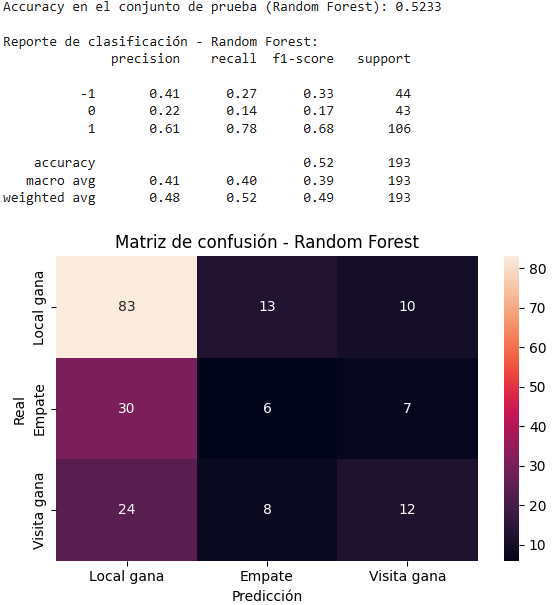

## 6. Discusión de Resultados y Justificación Final

Al observar la matriz de confusión y el reporte de clasificación, el **Random Forest** demuestra su capacidad para manejar el desbalance de clases típico del fútbol (donde el empate suele ser menos frecuente o más difícil de predecir que la victoria local).

La justificación final para elegir este modelo como el "ganador" del proyecto se basa en la **teoría del compromiso sesgo-varianza**:
1.  Los modelos lineales (como se vio en la exploración previa) tienen un alto **sesgo**; asumen que el fútbol es lineal, lo cual es falso, resultando en un subajuste (underfitting).
2.  Los árboles de decisión individuales tienen alta **varianza**; memorizan los partidos pasados.
3.  **Random Forest** ocupa el punto óptimo matemático. Al descorrelacionar los árboles (vía *random features*) y promediar sus resultados, logramos capturar la estructura compleja de los partidos (bajo sesgo) manteniendo la estabilidad en las predicciones ante datos nuevos (baja varianza).

Además, el *Accuracy* obtenido (visible en los resultados de la celda anterior) valida que los patrones encontrados en los datos de entrenamiento son generalizables al conjunto de prueba, cumpliendo el objetivo principal del aprendizaje estadístico.

## 7. Conclusiones

En este proyecto vimos que usar **Random Forest** es una muy buena estrategia para predecir resultados deportivos, porque combina muchas decisiones simples para crear un modelo más estable y preciso.

A lo largo del trabajo observamos que:

* El **criterio Gini** ayuda a que el modelo seleccione las variables más útiles y separe mejor los datos.
* El uso de **bootstrap** y la **selección aleatoria de variables** evita que el modelo memorice los datos y permite que generalice mejor, algo muy importante en conjuntos ruidosos como los partidos de fútbol.
* El modelo funciona bien sin requerir funciones matemáticas complicadas, por lo que es flexible y se adapta a distintos tipos de información (estadísticas, números, categorías, etc.).

En resumen, combinar técnicas de aprendizaje supervisado con fundamentos de probabilidad y estadística nos permitió no solo predecir resultados, sino también entender mejor cómo se comportan los datos históricos del fútbol.

## 8. Referencias

Link a base de datos (obtenida de Kaggle):
https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup

Codigo que refiere a la aplicacion practica del modelo e imagen de metricas, obtenidos de: `PROYECTO INTEGRADOR.ipynb` dentro del presente repositorio.